In [28]:
# ================================
# 📊 Sales & Customer EDA Template
# ================================

# 1) Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# 2) Load Dataset
df = pd.read_csv("../Data/sales_dataset.csv")


In [30]:
# 3) Preview data
df.head()
df.info()
df.describe()

# 4) Check Missing Values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   OrderID     500 non-null    int64  
 1   OrderDate   500 non-null    object 
 2   CustomerID  500 non-null    object 
 3   Product     500 non-null    object 
 4   Category    500 non-null    object 
 5   Quantity    500 non-null    int64  
 6   UnitPrice   500 non-null    float64
 7   TotalSales  500 non-null    float64
 8   City        500 non-null    object 
 9   Channel     500 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 39.2+ KB


OrderID       0
OrderDate     0
CustomerID    0
Product       0
Category      0
Quantity      0
UnitPrice     0
TotalSales    0
City          0
Channel       0
dtype: int64

In [31]:
# 5) Convert Data Types
df['OrderDate'] = pd.to_datetime(df['OrderDate'])

# 6) Feature Engineering
df['Month'] = df['OrderDate'].dt.to_period('M')
df['Year'] = df['OrderDate'].dt.year

# 7) Summary Metrics
total_sales = df['TotalSales'].sum()
total_orders = df['OrderID'].nunique()
total_customers = df['CustomerID'].nunique()

print(total_sales, total_orders, total_customers)

27047.739999999998 500 488


In [32]:
# 8) Aggregations
monthly_sales = df.groupby('Month')['TotalSales'].sum()
top_products = df.groupby('Product')['TotalSales'].sum().sort_values(ascending=False).head(5)
city_sales = df.groupby('City')['TotalSales'].sum()

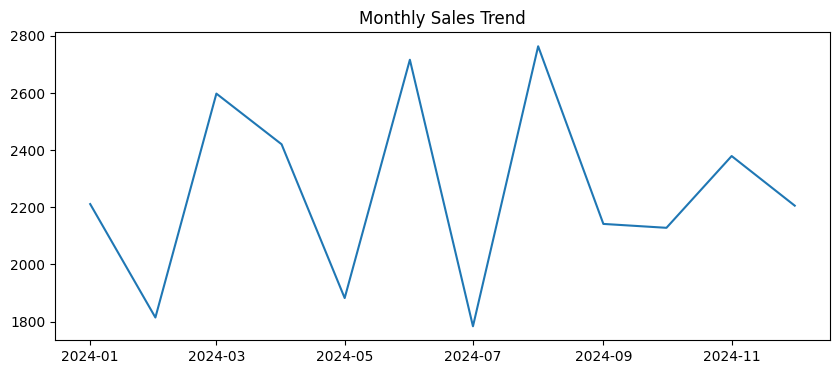

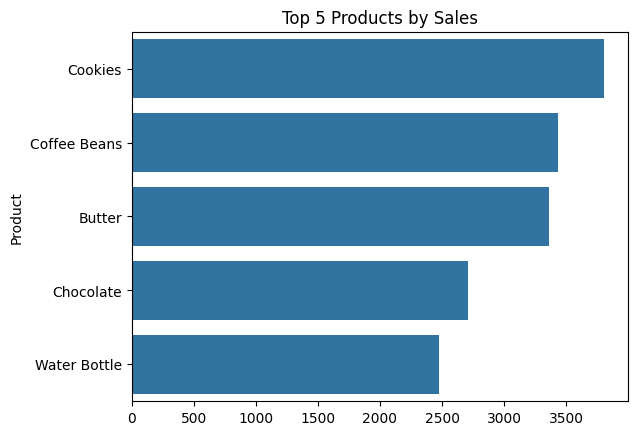

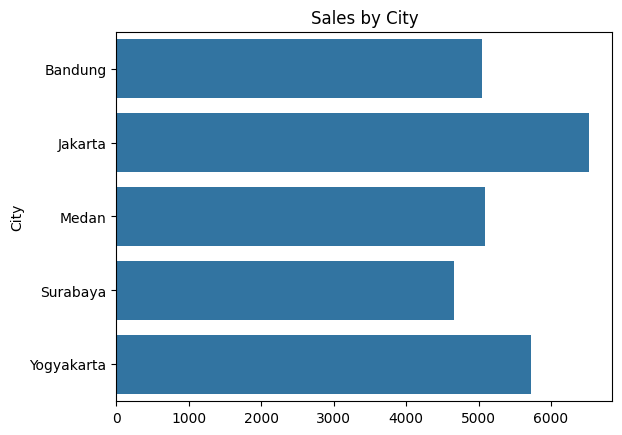

In [ ]:
# 9) Visualizations
plt.figure(figsize=(10,4))
plt.plot(monthly_sales.index.to_timestamp(), monthly_sales.values)
plt.title("Monthly Sales Trend")
plt.show()

sns.barplot(x=top_products.values, y=top_products.index)
plt.title("Top 5 Products by Sales")
plt.show()

sns.barplot(x=city_sales.values, y=city_sales.index)
plt.title("Sales by City")
plt.show()

df.to_csv("sales_dataset_cleaned.csv", index=False)